In [1]:
import utils

import pandas as pd
import datetime
import numpy as np
import sklearn.preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
# parameters

ticker = 'JPM'
date_str = '20140203'

In [3]:
# load engineered features

combined_output_file = '/'.join(['process', 'combined', date_str, ticker + '.csv'])
combined_data = pd.read_csv(combined_output_file)
combined_data['timestamp'] = combined_data['timestamp'].apply(lambda x: datetime.datetime.strptime(x.rstrip(':00') + '00', '%Y-%m-%d %H:%M:%S.%f%z'))
combined_data = combined_data.set_index(['timestamp'])
combined_data

,label,quote_classification,last_1_interval_positive,last_1_interval_negative,last_2_interval_positive,last_2_interval_negative,last_4_interval_positive,last_4_interval_negative,last_8_interval_positive,last_8_interval_negative,...,L6-BidAggRatio,L6-AskAggRatio,L7-BidAggRatio,L7-AskAggRatio,L8-BidAggRatio,L8-AskAggRatio,L9-BidAggRatio,L9-AskAggRatio,L10-BidAggRatio,L10-AskAggRatio
timestamp,,,,,,,,,,,,,,,,,,,,,
2014-02-03 09:31:01.641591-05:00,1.0,-1.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.579767,0.420233,0.847201,0.152799,0.776057,0.223943,0.697129,0.302871,0.713695,0.286305
2014-02-03 09:31:02.457012-05:00,-1.0,1.0,1.000000,0.000000,0.131589,0.868411,0.131589,0.868411,0.131589,0.868411,...,0.526001,0.473999,0.402175,0.597825,0.354336,0.645664,0.465830,0.534170,0.420189,0.579811
2014-02-03 09:31:03.447253-05:00,-1.0,-1.0,0.000000,1.000000,0.250034,0.749966,0.094349,0.905651,0.094349,0.905651,...,0.418880,0.581120,0.462980,0.537020,0.468608,0.531392,0.496574,0.503426,0.500714,0.499286
2014-02-03 09:31:04.433510-05:00,-1.0,-1.0,0.000000,1.000000,0.000000,1.000000,0.053753,0.946247,0.053753,0.946247,...,0.617855,0.382145,0.805753,0.194247,0.806254,0.193746,0.634252,0.365748,0.587736,0.412264
2014-02-03 09:31:05.647473-05:00,-1.0,-1.0,0.000000,0.000000,0.000000,1.000000,0.083304,0.916696,0.053753,0.946247,...,0.618867,0.381133,0.538131,0.461869,0.591243,0.408757,0.615907,0.384093,0.536656,0.463344
2014-02-03 09:31:06.506749-05:00,0.0,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.053753,0.946247,...,0.722585,0.277415,0.734910,0.265090,0.615134,0.384866,0.590707,0.409293,0.572610,0.427390
2014-02-03 09:31:07.389554-05:00,1.0,0.0,1.000000,0.000000,1.000000,0.000000,0.384219,0.615781,0.254027,0.745973,...,0.727384,0.272616,0.738465,0.261535,0.617605,0.382395,0.575290,0.424710,0.574726,0.425274
2014-02-03 09:31:08.687456-05:00,0.0,1.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.254027,0.745973,...,0.623250,0.376750,0.613854,0.386146,0.537021,0.462979,0.590705,0.409295,0.574729,0.425271
2014-02-03 09:31:09.773392-05:00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.352648,0.647352,...,0.623250,0.376750,0.590929,0.409071,0.537018,0.462982,0.573156,0.426844,0.511842,0.488158


In [4]:
list(combined_data.columns.values)

['label',
 'quote_classification',
 'last_1_interval_positive',
 'last_1_interval_negative',
 'last_2_interval_positive',
 'last_2_interval_negative',
 'last_4_interval_positive',
 'last_4_interval_negative',
 'last_8_interval_positive',
 'last_8_interval_negative',
 'last_16_interval_positive',
 'last_16_interval_negative',
 'last_32_interval_positive',
 'last_32_interval_negative',
 'L1-BidRatio',
 'L1-AskRatio',
 'L2-BidRatio',
 'L2-AskRatio',
 'L3-BidRatio',
 'L3-AskRatio',
 'L4-BidRatio',
 'L4-AskRatio',
 'L5-BidRatio',
 'L5-AskRatio',
 'L6-BidRatio',
 'L6-AskRatio',
 'L7-BidRatio',
 'L7-AskRatio',
 'L8-BidRatio',
 'L8-AskRatio',
 'L9-BidRatio',
 'L9-AskRatio',
 'L10-BidRatio',
 'L10-AskRatio',
 'L1-BidAggRatio',
 'L1-AskAggRatio',
 'L2-BidAggRatio',
 'L2-AskAggRatio',
 'L3-BidAggRatio',
 'L3-AskAggRatio',
 'L4-BidAggRatio',
 'L4-AskAggRatio',
 'L5-BidAggRatio',
 'L5-AskAggRatio',
 'L6-BidAggRatio',
 'L6-AskAggRatio',
 'L7-BidAggRatio',
 'L7-AskAggRatio',
 'L8-BidAggRatio',
 'L8-A

In [5]:
# RNN architecture parameters

sequence_length = 10

In [6]:
# construct datasets for training

datasets = []
data_matrix = combined_data.as_matrix()
for index in range(len(combined_data)-sequence_length):
    datasets.append(data_matrix[index:index+sequence_length])
datasets = np.array(datasets)
datasets.shape

(22118, 10, 54)

In [7]:
# extract label data

label_field_index = 0

labels = datasets[:,sequence_length-1,label_field_index]
labels.shape

(22118,)

In [8]:
# extract feature data

indices = list(np.arange(datasets.shape[2]))
del indices[label_field_index] # remove label field

observations = datasets[:,:,indices]
observations.shape

(22118, 10, 53)

In [9]:
# partition the data into training, validation, and testing

# unsorted data is used in order to avoid information spill over

valid_set_size_percentage = 10
test_set_size_percentage = 10

valid_set_size = int(np.round(valid_set_size_percentage/100*observations.shape[0]))
test_set_size = int(np.round(test_set_size_percentage/100*observations.shape[0]))
train_set_size = observations.shape[0] - (valid_set_size+test_set_size)

X_train = observations[:train_set_size, :, :]
y_train = labels[:train_set_size]

X_valid = observations[train_set_size:train_set_size+valid_set_size, :, :]
y_valid = labels[train_set_size:train_set_size+valid_set_size]

X_test = observations[train_set_size+valid_set_size:, :, :]
y_test = labels[train_set_size+valid_set_size:]

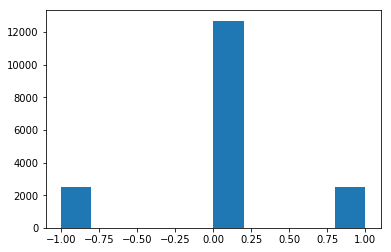

In [10]:
# plot label distribution in the training set

plt.hist(y_train);

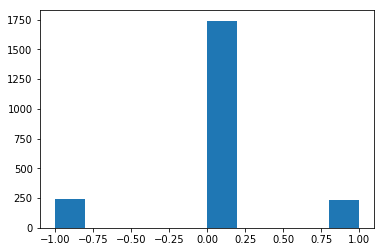

In [11]:
# plot label distribution in the validation set

plt.hist(y_valid);

In [12]:
# apply upsampling to balance labels

seed = 42
X_train_upsampled, y_train_upsampled = utils.fit_sample(X_train, y_train, seed)

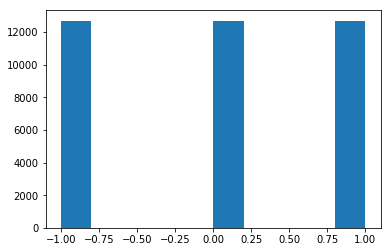

In [13]:
# check distribution

plt.hist(y_train_upsampled);

In [14]:
# randomise the training data

indices = np.arange(y_train_upsampled.shape[0])
indices = np.random.permutation(indices)
X_train_upsampled = X_train_upsampled[np.array(indices)]
y_train_upsampled = y_train_upsampled[np.array(indices)]

In [15]:
# convert response to onehot encoding

np.unique(labels)

array([-1.,  0.,  1.])

In [16]:
label_encoding_order = [-1.,0.,1.]

label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(label_encoding_order)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [17]:
np.array([-1,1,0,1])

array([-1,  1,  0,  1])

In [19]:
label_binarizer.transform(np.array([-1, 0, 1]))

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [16]:
y_train_upsampled_onehot = label_binarizer.transform(y_train_upsampled)
y_train_upsampled_onehot.shape

(38076, 3)

In [17]:
y_valid_onehot = label_binarizer.transform(y_valid)
y_valid_onehot.shape

(2212, 3)

In [18]:
y_test_onehot = label_binarizer.transform(y_test)
y_test_onehot.shape

(2212, 3)

In [19]:
# the dataset to work with is too small

# persist data

with open("data.bin", "wb") as f:
    np.save(f, X_train_upsampled)
    np.save(f, y_train_upsampled_onehot)
    np.save(f, X_valid)
    np.save(f, y_valid_onehot)
    np.save(f, X_test)
    np.save(f, y_test_onehot)
